# Advanced Regression Assignment
## House Price Prediction
---

## Problem Statement
---
Build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

Outcomes required:
- Which variables are significant in predicting the price of a house, and
- How well those variables describe the price of a house.

Determine the optimal value of lambda for ridge and lasso regression.

### Analysis approach

---

 - Read, understand, and clean the data
 - Data Visualization
 - Feature cleanup
 - Prepare the data for modelling (train-test split, rescaling)
 - Scale the data
 - Linear regression model
 - Ridge regression model
 - Lasso regression model
 - Model Comparison
 - Conclusion

### Read, understand, and clean the data

In [91]:
# Import required python libraries to work with CSV file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [92]:
# Load given dataset day.csv file in dataset variable
dataset = pd.read_csv("train.csv")
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [93]:
# Get basic information about dataset
dataset.shape

(1460, 81)

In [94]:
# Get basic information about dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [95]:
# Get basic information about dataset
dataset.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [96]:
# Drop irrelevant columns that will not affect the house price
# Id - this is an index column

column_names_irrelevant = ['Id']
dataset.drop(column_names_irrelevant, axis = 1, inplace=True)
dataset.shape

(1460, 80)

### Handling Null values

In [97]:
# Find number of null values in each column
dataset.isna().sum().sort_values(ascending = False).head(25)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtCond          37
BsmtQual          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
MSSubClass         0
Fireplaces         0
Functional         0
KitchenQual        0
KitchenAbvGr       0
BedroomAbvGr       0
dtype: int64

[]

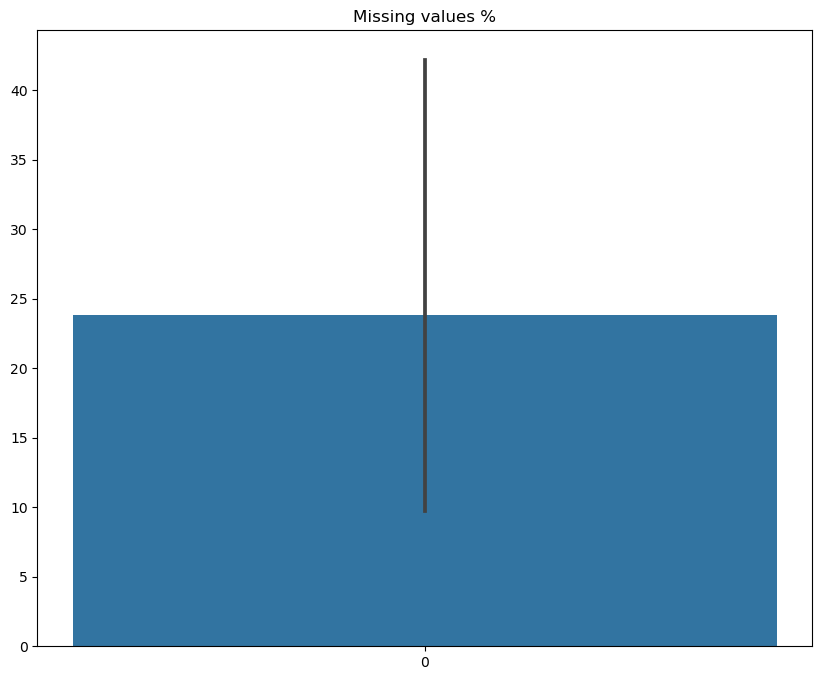

In [98]:
missing_vals_percent = (dataset.isnull().sum() / dataset.isnull().count()*100).sort_values(ascending = False).head(20)

plt.figure(figsize = (10, 8))
sns.barplot(missing_vals_percent[:])
plt.title('Missing values %')
plt.plot()

In [99]:
# Drop Top 4 features as those have a lot of data missing

cols_to_drop = ['PoolQC', 'MiscFeature', 'Alley', 'Fence']
dataset.drop(cols_to_drop, axis = 1, inplace=True)
dataset.shape

(1460, 76)

In [100]:
dataset.isna().sum().sort_values(ascending = False).head(20)

FireplaceQu     690
LotFrontage     259
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
BsmtExposure     38
BsmtFinType2     38
BsmtQual         37
BsmtCond         37
BsmtFinType1     37
MasVnrType        8
MasVnrArea        8
Electrical        1
Fireplaces        0
KitchenQual       0
KitchenAbvGr      0
BedroomAbvGr      0
HalfBath          0
dtype: int64

In [101]:
# As per data_description file provided - NA value actually have a real meaning,
# for e.g. FireplaceQu NA means 'No Fireplace', Alley NA means 'No Alley access'
# Replacing meaningful 'NA' values with 'None' value
# so that python isna() function can distinguish between real null and meaningful null

columns_with_meaningful_NA_value = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
                                    'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish',
                                    'GarageQual', 'GarageCond']

for col in columns_with_meaningful_NA_value:
    dataset[col] = dataset[col].fillna('None')


dataset['GarageYrBlt'] = dataset['GarageYrBlt'].fillna(0.0)

dataset.shape

(1460, 76)

In [102]:
dataset.isna().sum().sort_values(ascending = False).head(20)

LotFrontage     259
MasVnrType        8
MasVnrArea        8
Electrical        1
KitchenAbvGr      0
FireplaceQu       0
Fireplaces        0
Functional        0
TotRmsAbvGrd      0
KitchenQual       0
MSSubClass        0
GarageType        0
HalfBath          0
FullBath          0
BsmtHalfBath      0
BsmtFullBath      0
GrLivArea         0
LowQualFinSF      0
2ndFlrSF          0
BedroomAbvGr      0
dtype: int64

In [103]:
# Columns left with null values = ['LotFrontage', 'MasVnrArea' , 'MasVnrType', 'Electrical']

# Filling LotFrontage Continuous variables with median value
dataset['LotFrontage']= dataset['LotFrontage'].fillna(dataset['LotFrontage'].median())

# Filling MasVnrType with None (No Masonry veneer)
dataset['MasVnrType']= dataset['MasVnrType'].fillna('None')

# Filling MasVnrArea with 0 (No Masonry veneer - zero area)
dataset['MasVnrArea']= dataset['MasVnrArea'].fillna(0)

# Filling Electrical with mode value (SBrkr)
dataset['Electrical']= dataset['Electrical'].fillna(dataset['Electrical'].mode()[0])

In [104]:
dataset.isna().sum().sum()

0

#### `Dataset does not contain any null value now.`

### Handle duplicates

In [105]:
# Find and drop duplicate values
dataset.drop_duplicates()
dataset.shape

(1460, 76)

### Derive features

In [106]:
# we can calculate property age at the time of sale, 
# as generally older properties have low value, so this might be a significant variable

dataset['houseAge'] = dataset['YrSold'] - dataset['YearBuilt']
dataset.shape

(1460, 77)

### Handle Outliers

In [107]:
numeric_columns = dataset.select_dtypes(exclude=object).columns
print('Total Numeric columns: ' + str(len(numeric_columns)))

Total Numeric columns: 38


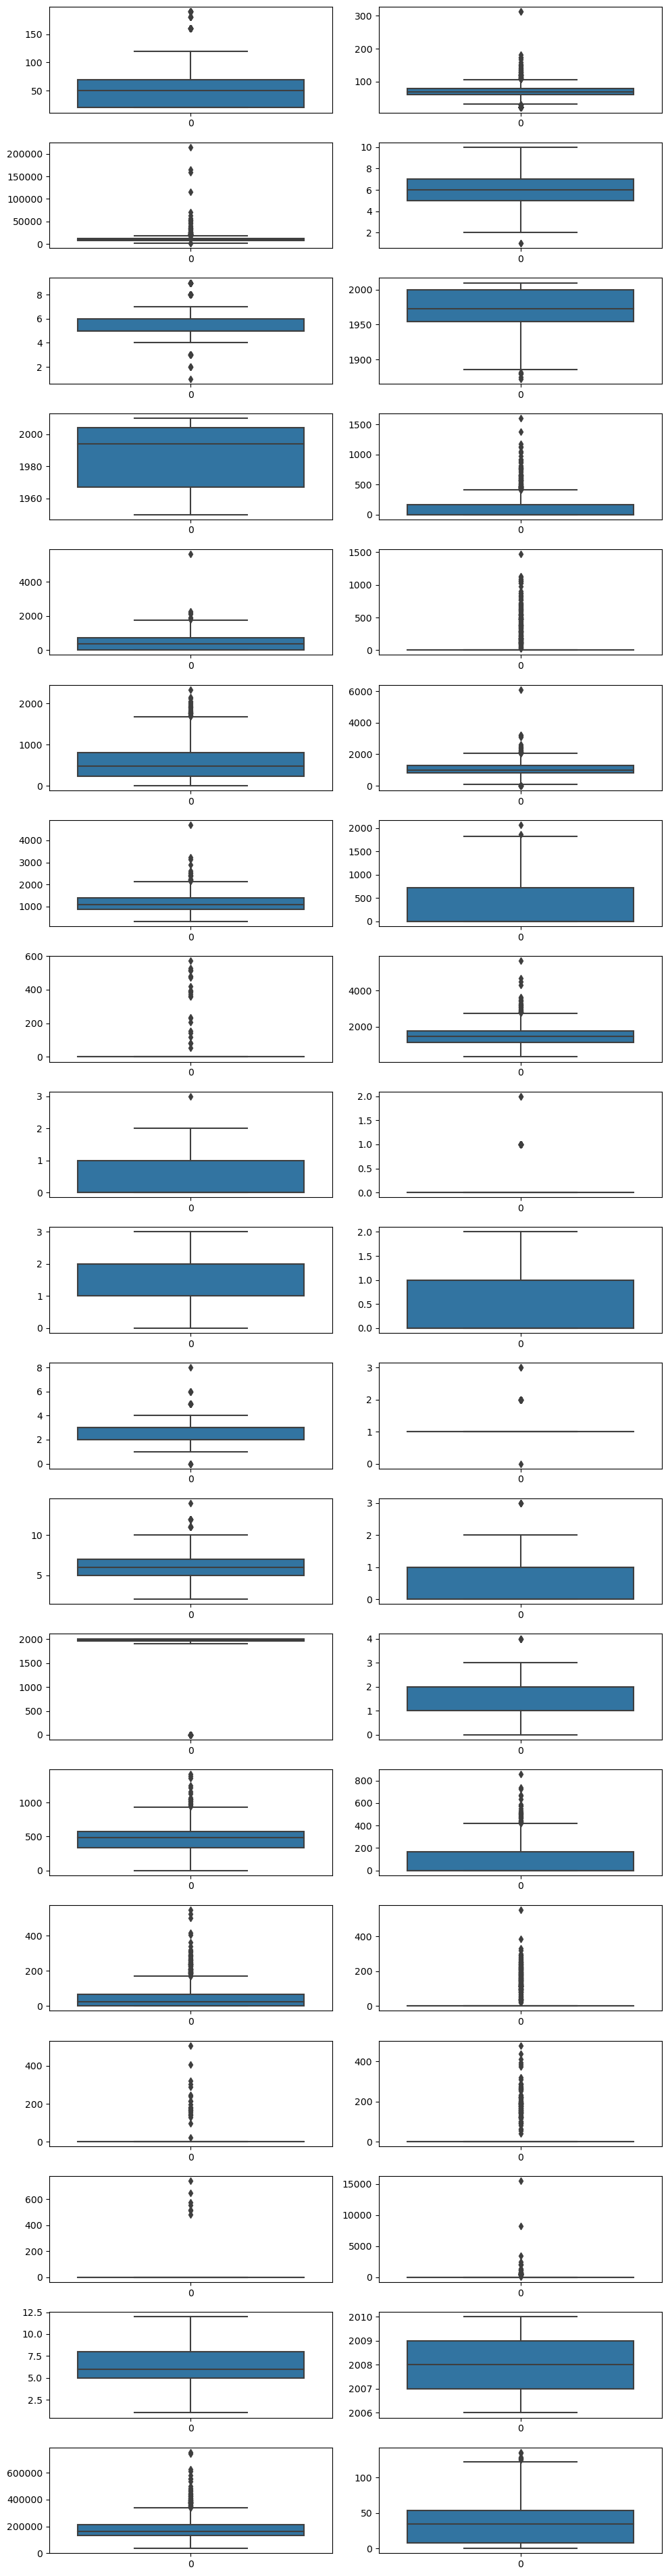

In [108]:
# Box Plot features to visualize outliers
plt.figure(figsize = (10, 40))

plotCounter = 1
for col in numeric_columns:
    plt.subplot(20, 2, plotCounter)
    sns.boxplot(dataset[col])
    plotCounter = plotCounter + 1

plt.tight_layout()
plt.show()

#### Observations:
 - Lot of outliers are visible in LotFrontage, LotArea, MasVnrArea, BsmtFinSF2 and other features
 - Few features have most values unique like PoolArea, MiscVal, 3SsnPorch, ScreenPorch etc.

In [109]:
# Based on above observations, we can drop few columns

cols_to_drop = ['PoolArea', 'MiscVal', '3SsnPorch']
dataset.drop(cols_to_drop, axis = 1, inplace=True)
dataset.shape

(1460, 74)

In [110]:
# For using IQR method to drop outliers, we need to find all features with numeric values
# Use data type of column to find numeric features
dataset.select_dtypes(exclude=object).columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'ScreenPorch', 'MoSold', 'YrSold', 'SalePrice',
       'houseAge'],
      dtype='object')

In [111]:
# Drop outliers for all numeric features using IQR method
numerical_columns = dataset.select_dtypes(exclude=object).columns

def drop_outlier_rows(dataset, col):
    Q1 = dataset[col].quantile(.05)
    Q3 = dataset[col].quantile(.95)
    IQR = Q3 - Q1
    lower_Range = Q1 - (1.5 * IQR)
    upper_Range = Q3 + (1.5 * IQR)
    dataset = dataset[(dataset[col] >= lower_Range) & (dataset[col] <= upper_Range)]
    return dataset

for col in numerical_columns:
    dataset = drop_outlier_rows(dataset, col)

dataset.shape

(1275, 74)

### Correlated features

In [112]:
numeric_columns = dataset.select_dtypes(exclude=object).columns

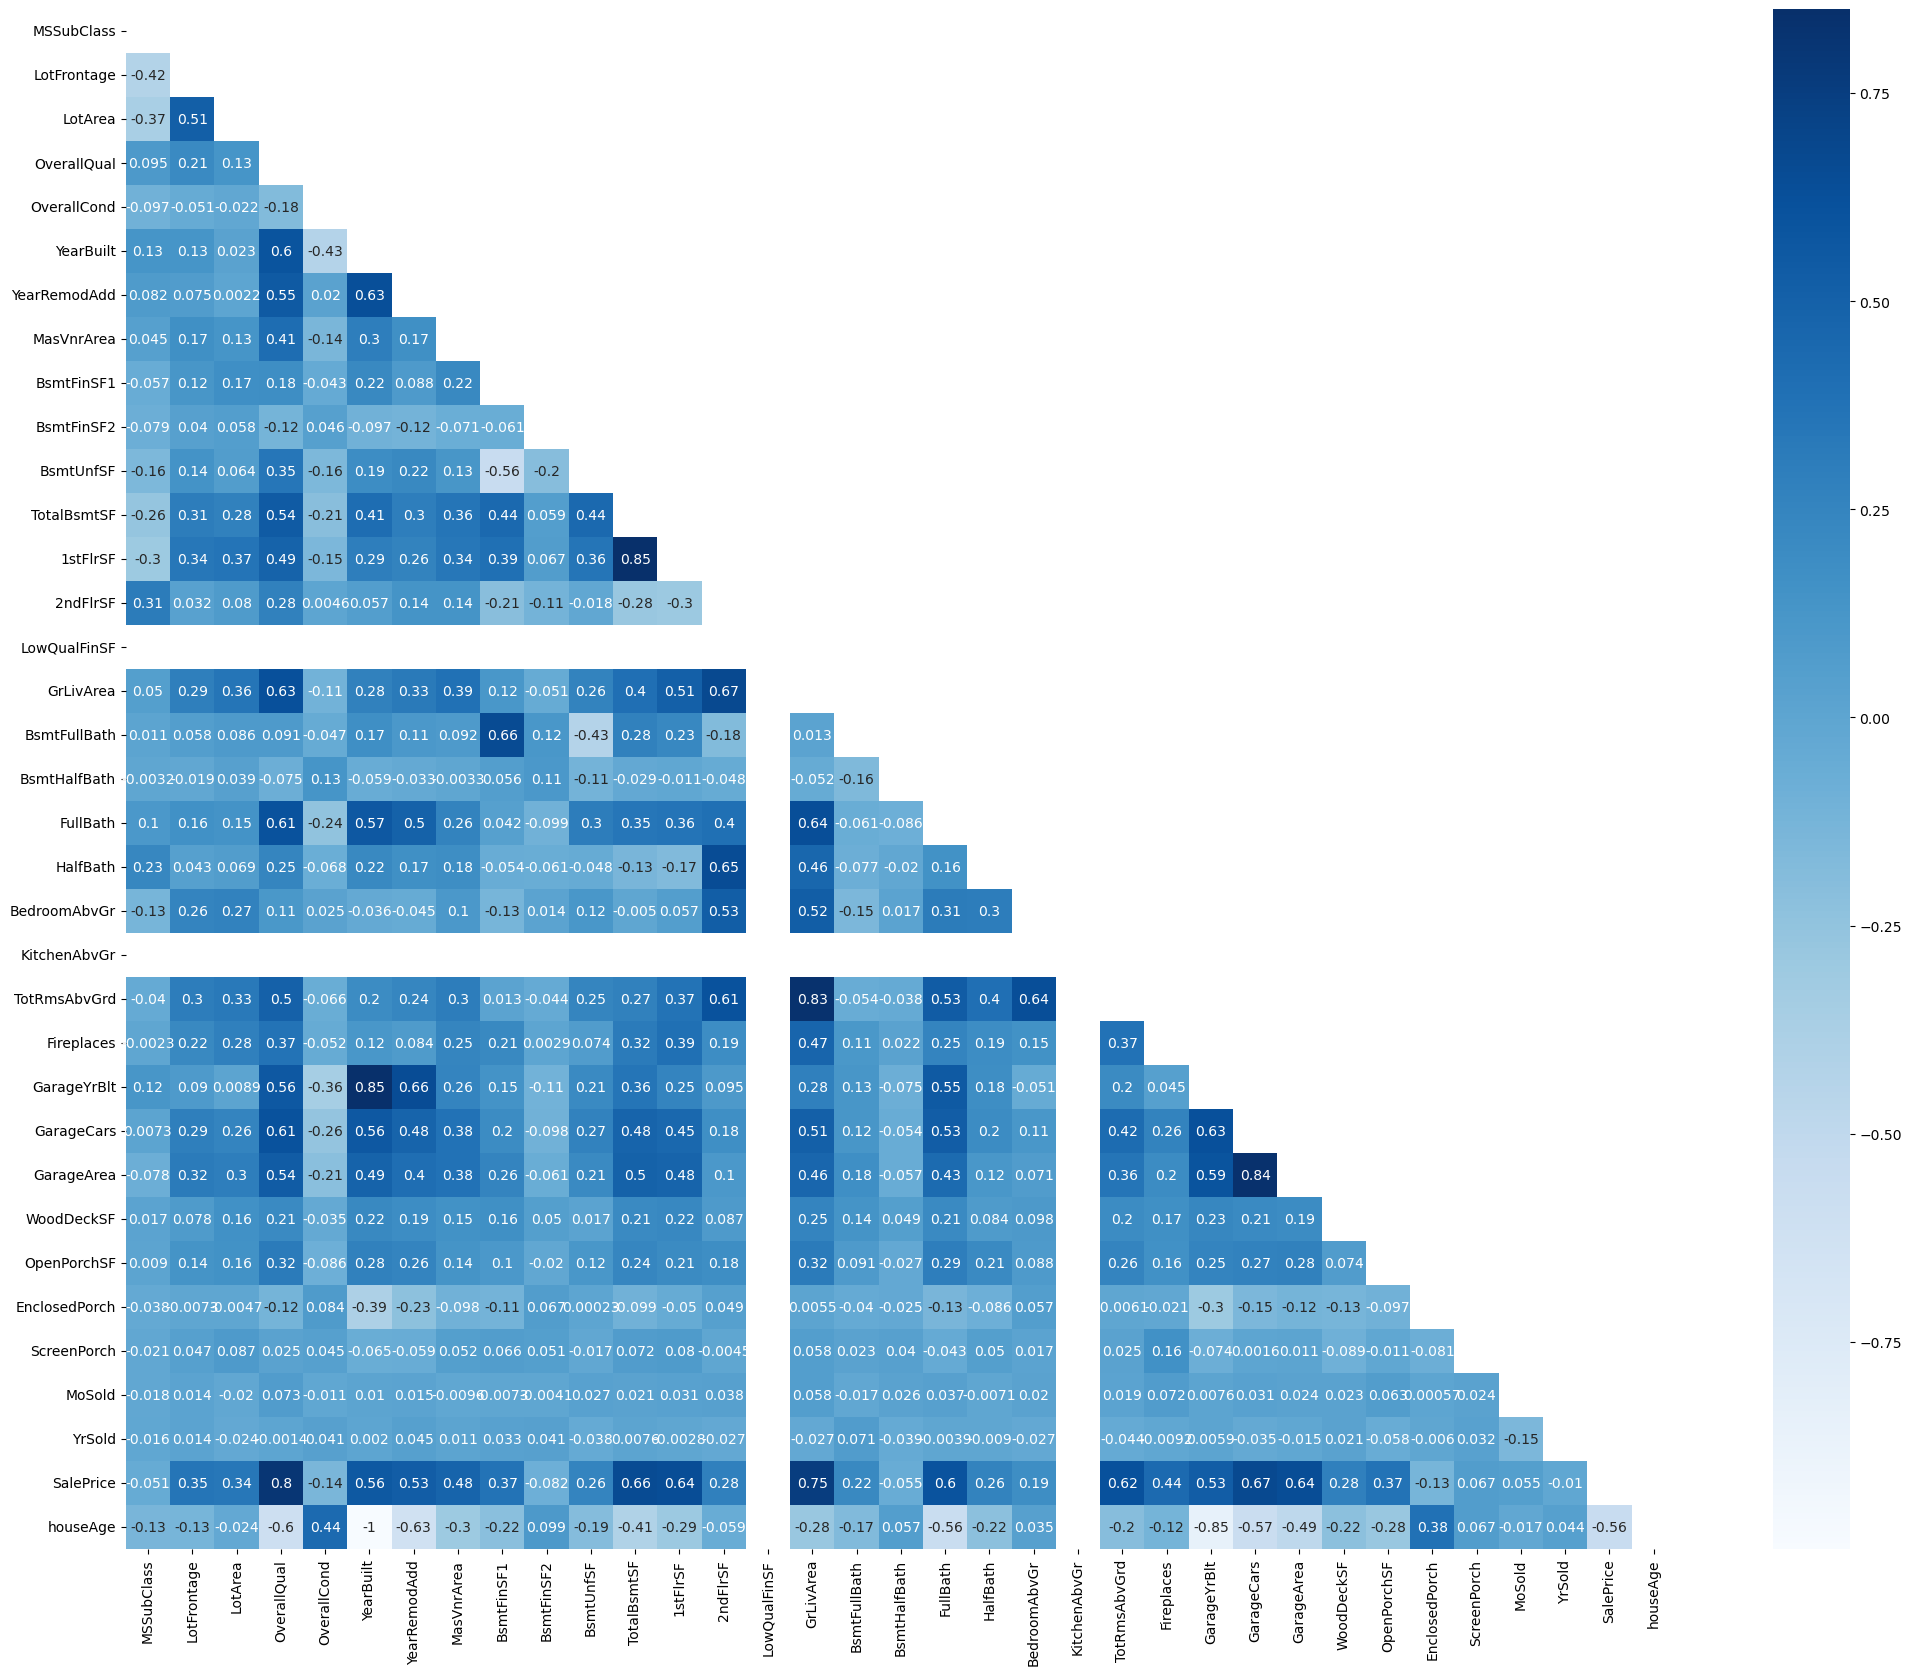

In [113]:
# plot correlation graph

plt.figure(figsize = (25, 20))

mask = np.triu(np.ones_like(dataset.corr(), dtype= bool))
sns.heatmap(dataset.corr(), mask = mask, cmap="Blues", annot = True)

plt.show()

#### Observations:
 - 1stFlrSF is related to TotalBsmtSf (0.85)
 - TotRmsAbvGrd is related to GrLivArea (0.83)
 - GarageYrBlt is realted to YearBlt (0.85)
 - GarageArea is related to GarageCars (0.84)
 - SalePrice is related to OverallQual, GrLivArea, GarageCars, GarageArea, TotalRmsAbvGrd, TotalBsmtSf, 1stFlrSf, FullBath

In [114]:
# Based on above observations, removing correlated columns

col_names_related = ['TotRmsAbvGrd', 'GarageYrBlt', 'GarageArea']
dataset.drop(col_names_related, axis = 1, inplace=True)
dataset.shape

(1275, 71)

### Visualizing trends

In [115]:
numeric_columns = dataset.select_dtypes(exclude=object).columns
print('Total Numeric Columns :' + str(len(numeric_columns)))

Total Numeric Columns :32


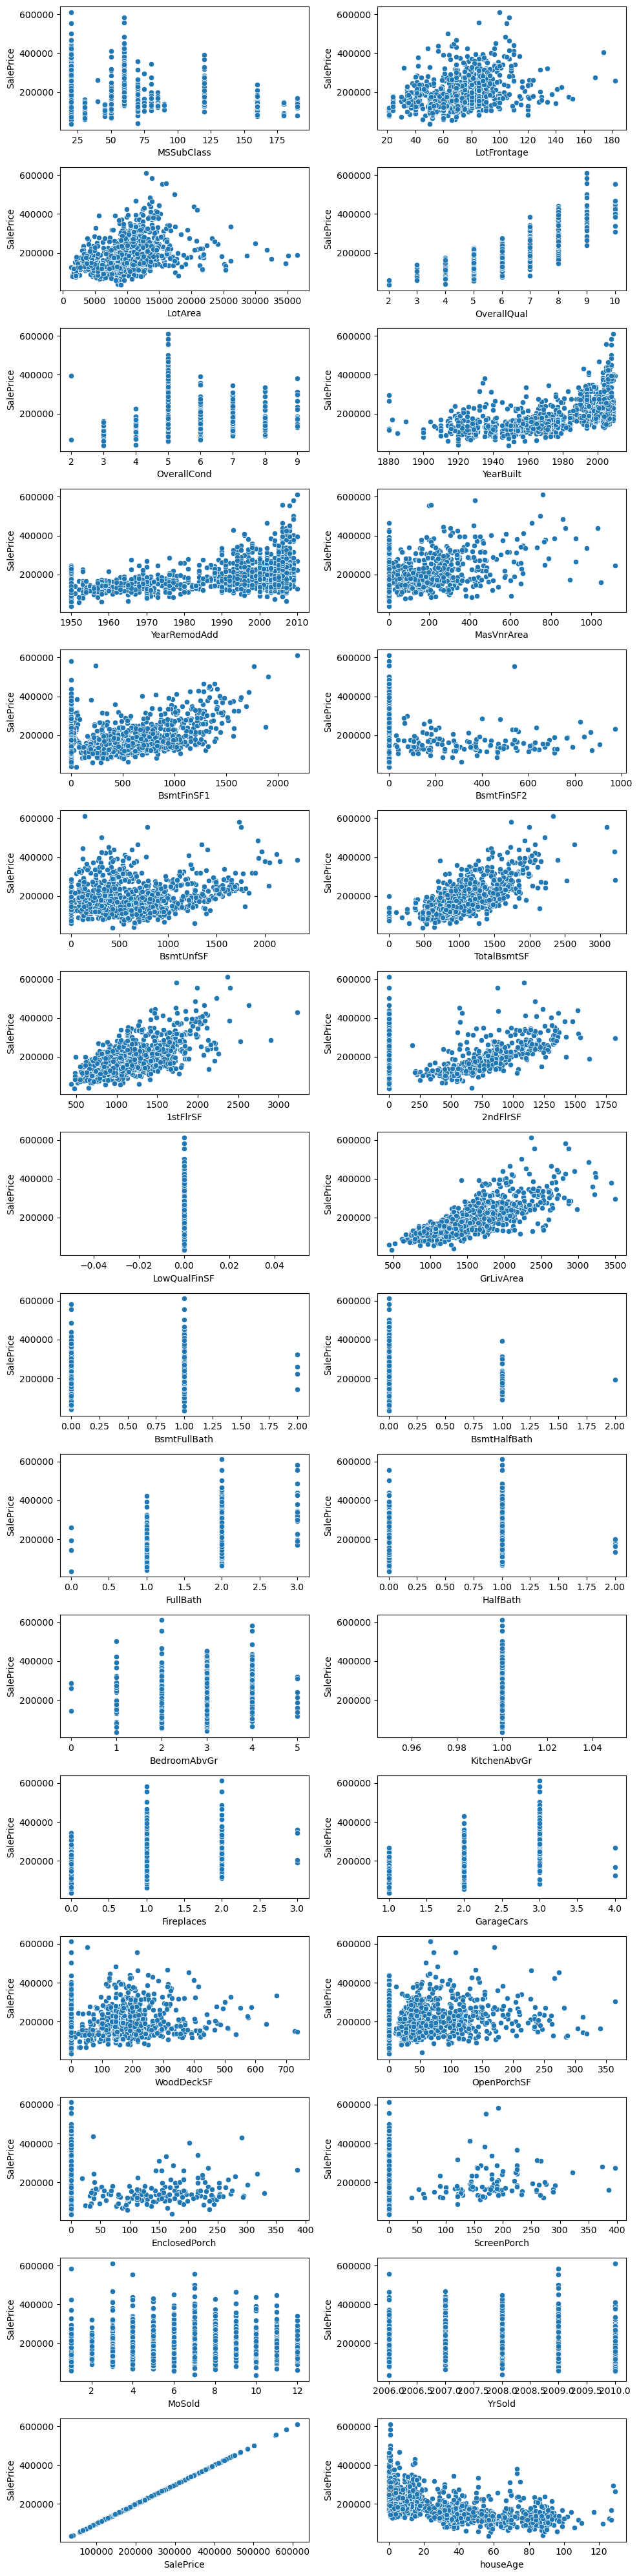

In [116]:
# Plotting Scatter plots to understand feature trend with sale price
plt.figure(figsize=(10, 40))

plotCounter = 1
for col in numeric_columns:
    plt.subplot(16, 2, plotCounter)
    sns.scatterplot(x = col, y = 'SalePrice', data = dataset)
    plotCounter = plotCounter + 1

plt.tight_layout()
plt.show()

#### Observations:
 - Lot of numeric variables are also categorical in nature (all graphs with vertical bars)
 - LotFrontage, LotArea, GrLivArea, GarageArea are few of the features that show a linear trend with salePrice
 - KitchenAbvGr, LowQualFinSF features have single vertical bar in graph - that shows all values for these features are same, and these can be dropped

In [117]:
# Based on above observations, few features can be dropped
col_names_with_all_values_same = ['LowQualFinSF', 'KitchenAbvGr']
dataset.drop(col_names_with_all_values_same, axis = 1, inplace=True)
dataset.shape

(1275, 69)

In [118]:
category_columns = dataset.select_dtypes(include=object).columns
print('Total Category Columns :' + str(len(category_columns)))

Total Category Columns :39


#### Observations
 - Street, Utilities, Condition2, Heating, CentralAir, Functional, GarageQual are feature dominated by single category

In [119]:
# Based on above observations, few columns can be dropped
cols_to_drop = ['Street', 'Utilities', 'Condition2', 'Heating', 'CentralAir', 'Functional', 'GarageQual']
dataset.drop(cols_to_drop, axis = 1, inplace=True)
dataset.shape

(1275, 62)

### Prepare the data for modelling (train-test split, rescaling)

### Encode Variables\ Dummy variables

In [120]:
# Create Dummy variables for all categorical columns
category_columns = dataset.select_dtypes(include=object).columns

for col in category_columns:
    datasetCol = pd.get_dummies(dataset[col], prefix = col, drop_first=True)
    dataset = pd.concat([dataset, datasetCol], axis = 1)
    dataset.drop(col, axis = 1, inplace = True)

dataset.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,0,1,0,0,0,1,0


In [121]:
dataset.shape

(1275, 206)

### Split the dataset into train and test

In [122]:
# import required libraries
import sklearn 
from sklearn.model_selection import train_test_split

In [123]:
# Prepare dependant and independant variables
y = dataset.pop('SalePrice')
X = dataset

In [124]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, train_size = 0.7, random_state = 100)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(892, 205)
(383, 205)
(892,)
(383,)


### Data Scaling

In [125]:
from sklearn.preprocessing import MinMaxScaler

In [126]:
numeric_columns = X_train.select_dtypes(exclude=object).columns

scaler = MinMaxScaler()

X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])

X_test[numeric_columns] = scaler.transform(X_test[numeric_columns])

X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
82,0.000000,0.387755,0.253011,0.750,0.333333,0.984496,0.950000,0.419731,0.015082,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
772,0.352941,0.496599,0.185199,0.500,0.333333,0.744186,0.433333,0.000000,0.192870,0.130658,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
587,0.382353,0.360544,0.211364,0.375,0.500000,0.790698,0.533333,0.000000,0.307130,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
52,0.411765,0.605442,0.203750,0.375,0.333333,0.643411,0.216667,0.000000,0.047532,0.732510,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1116,0.352941,0.326531,0.183239,0.750,0.333333,0.945736,0.866667,0.000000,0.161335,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


## Train the model

### Linear Regression

In [127]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.api as sm

In [128]:
# add constant
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

# create model
lr = sm.OLS(y_train, X_train_sm)

#fit
lm = lr.fit()

# summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     54.80
Date:                Wed, 29 Nov 2023   Prob (F-statistic):               0.00
Time:                        12:44:04   Log-Likelihood:                -10019.
No. Observations:                 892   AIC:                         2.042e+04
Df Residuals:                     700   BIC:                         2.134e+04
Df Model:                         191                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -7893.4199   2.97e+04     -0.266      0.790   -6.62e+04    5.04e+04
MSSubClass            -2.085e+04   2.49e+04     -0.838      0.402   -6.97e+04     2.8e+04
LotFrontage            1.205e+04   8617.815      1.398      0.163   -4871.428     2.9e+04
LotArea                5.128e+04   1.12e+04      4.568      0.000    2.92e+04    7.33e+04
OverallQual            5.167e+04   1.01e+04      5.101      0.000    3.18e+04    7.16e+04
OverallCond            3.843e+04   6312.079      6.088      0.000     2.6e+04    5.08e+04
YearBuilt              2.146e+04   1.61e+04      1.335      0.182   -1.01e+04     5.3e+04
YearRemodAdd           5652.0196   4377.025      1.291      0.197   -2941.650    1.42e+04
MasVnrArea             1.488e+04   7895.475      1.885      0.060    -618.951    3.04e+04
BsmtFinSF1             6.195e+04   7774.825      7.968      0.000    4.67e+04    7.72e+04
BsmtFinSF2             1.426e+04   1.13e+04      1.267      0.206   -7835.272    3.64e+04
BsmtUnfSF               1.67e+04   7106.087      2.350      0.019    2744.709    3.06e+04
TotalBsmtSF            5.991e+04   9850.058      6.082      0.000    4.06e+04    7.92e+04
1stFlrSF               4.992e+04   1.08e+04      4.612      0.000    2.87e+04    7.12e+04
2ndFlrSF               6.776e+04   1.09e+04      6.221      0.000    4.64e+04    8.92e+04
GrLivArea              8.052e+04   7652.074     10.523      0.000    6.55e+04    9.55e+04
BsmtFullBath           3943.7350   4652.529      0.848      0.397   -5190.849    1.31e+04
BsmtHalfBath          -1319.8904   6990.992     -0.189      0.850    -1.5e+04    1.24e+04
FullBath               8376.9233   8832.241      0.948      0.343   -8963.935    2.57e+04
HalfBath                812.4513   5372.959      0.151      0.880   -9736.595    1.14e+04
BedroomAbvGr          -2.099e+04   7906.059     -2.654      0.008   -3.65e+04   -5462.861
Fireplaces             2226.0740   9342.982      0.238      0.812   -1.61e+04    2.06e+04
GarageCars             2.356e+04   5742.735      4.102      0.000    1.23e+04    3.48e+04
WoodDeckSF             7303.6055   4808.542      1.519      0.129   -2137.288    1.67e+04
OpenPorchSF            8656.1990   5280.029      1.639      0.102   -1710.391     1.9e+04
EnclosedPorch          9587.5942   6281.422      1.526      0.127   -2745.091    2.19e+04
ScreenPorch            1.642e+04   5703.908      2.879      0.004    5222.327    2.76e+04
MoSold                -3630.5757   3199.178     -1.135      0.257   -9911.709    2650.558
YrSold                 -286.9625   2591.123     -0.111      0.912   -5374.267    4800.342
houseAge              -2.918e+04    1.6e+04     -1.822      0.069   -6.06e+04    2264.818
MSZoning_FV            3.792e+04    1.6e+04      2.363      0.018    6406.750    6.94e+04
MSZoning_RH            

In [129]:
def calculate_score_metrics(y_train, y_pred_train, y_test, y_pred_test):
    metric = []
    
    r2_train = r2_score(y_train, y_pred_train)
    print('R2 score train : ', r2_train)
    metric.append(r2_train)

    r2_test = r2_score(y_test, y_pred_test)
    print('R2 score test  : ', r2_test)
    metric.append(r2_test)

    rss_train = np.sum(np.square(y_train - y_pred_train))
    print('RSS score train : ', rss_train)
    metric.append(rss_train)

    rss_test = np.sum(np.square(y_test - y_pred_test))
    print('RSS score test  : ', rss_test)
    metric.append(rss_test)

    mse_train = mean_squared_error(y_train, y_pred_train)
    print('MSE score train : ', mse_train)
    metric.append(mse_train ** 0.5)

    mse_test = mean_squared_error(y_test, y_pred_test)
    print('MSE score test  : ', mse_test)
    metric.append(mse_test ** 0.5)
    
    return metric

In [130]:
# Calculate score metrics - R2 Score, RSS, RSME
y_pred_train = lm.predict(X_train_sm)
y_pred_test = lm.predict(X_test_sm)

metric_linear_regression = calculate_score_metrics(y_train, y_pred_train, y_test, y_pred_test)

R2 score train :  0.9373153675973337
R2 score test  :  0.8957153676610253
RSS score train :  297773933105.8281
RSS score test  :  241005997390.5777
MSE score train :  333827279.26662344
MSE score test  :  629258478.8265736


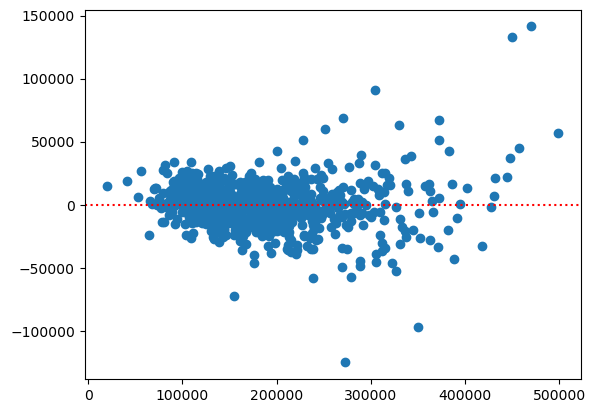

In [131]:
# Residual analysis
y_res = y_train - y_pred_train # Residuals

# Residual v/s predictions plot
plt.scatter(y_pred_train , y_res)
plt.axhline(y=0, color='r', linestyle=':')
plt.show()

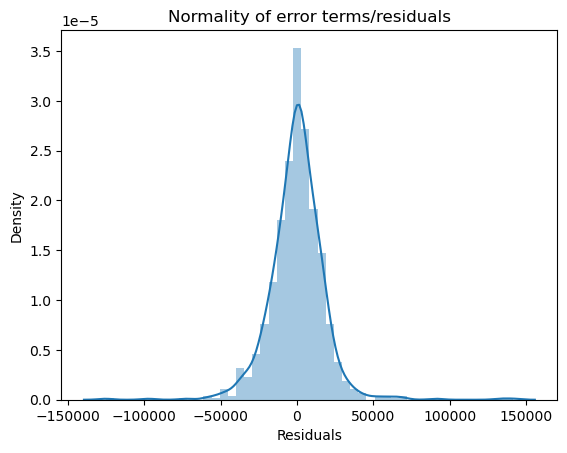

In [132]:
# Distribution of errors
p = sns.distplot(y_res,kde=True)

p = plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

### Ridge Regression

Let's now try predicting house prices using ridge regression.

In [133]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [134]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [135]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 3.0}


In [136]:
# Fitting Ridge model for best alpha
alpha = 3.0
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-12875.9768183   13389.44067818  26622.84731045  48691.63147989
  30826.67634798  14858.96656332   6849.03366682  18610.95185224
  49115.19230225   2769.42032097  13287.49651129  44849.35271433
  49610.23282052  38766.5924305   63017.62284031   6236.55320056
  -2230.92304571  17844.45048081   4505.7242616   -4890.20646759
   9838.53882876  24010.90950064   7725.11770946   8674.33225025
   7625.02129794  12240.41055362  -3208.33805515   -353.48038545
 -14869.92719543  10323.8777699    5627.45421963   8752.56902303
   1841.4967299   -2454.95685403  -3104.31810412    821.68617782
   4774.20098331  -8304.80622886    568.70768853   8026.92808917
 -10275.26280696  -8074.06264341  -1865.46217875  -2788.44076249
  -6221.95004569    440.89203088   5171.42206247   6454.35241885
  -5140.37422011  -5306.67866588  18520.04606438 -11033.92197242
 -11574.86004021  -2088.23845675  -5563.74614954 -11634.82955216
 -10661.68963727   7656.06763638  -8283.36199354  16489.06695698
  21655.99541547  -7046.3

In [137]:
# Calculate score metrics - R2 Score, RSS, RSME
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric_ridge_regression = calculate_score_metrics(y_train, y_pred_train, y_test, y_pred_test)

R2 score train :  0.9314815383536557
R2 score test  :  0.9119658375856147
RSS score train :  325486662883.0217
RSS score test  :  203450505038.5418
MSE score train :  364895361.97648174
MSE score test  :  531202363.0249133


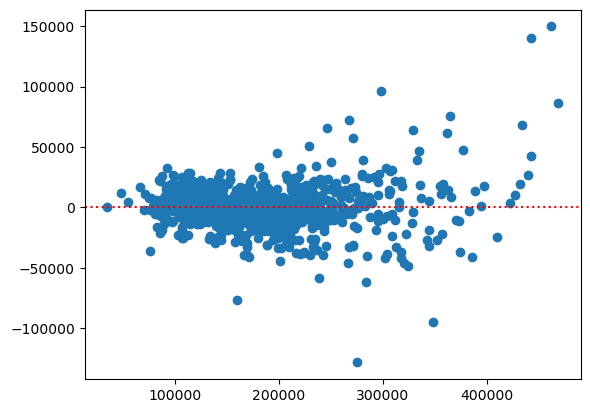

In [138]:
# Residual analysis
y_res = y_train - y_pred_train # Residuals

# Residual v/s predictions plot
plt.scatter(y_pred_train , y_res)
plt.axhline(y=0, color='r', linestyle=':')
plt.show()

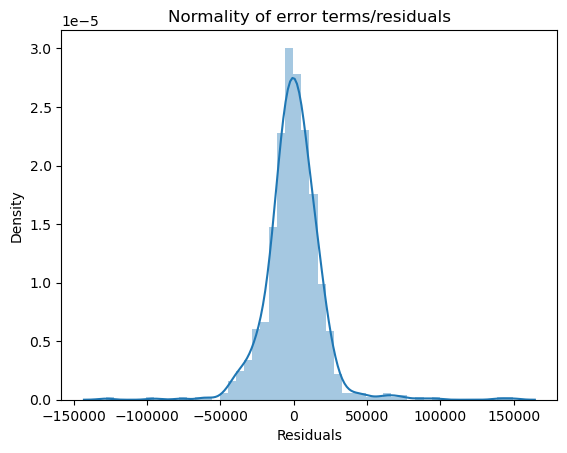

In [139]:
# Distribution of errors
p = sns.distplot(y_res,kde=True)

p = plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

### Lasso Regression

Let's now try predicting house prices using Lasso regression.

In [140]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [141]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 100}


In [142]:
# Fitting Lasso model for best alpha

alpha = 100

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=100)

In [143]:
lasso.coef_

array([-1.07262069e+04,  8.58327113e+03,  2.13910325e+04,  6.83447029e+04,
        3.09080141e+04,  3.21176068e+04,  4.95303476e+03,  1.37528049e+04,
        4.27000362e+04,  0.00000000e+00,  0.00000000e+00,  6.11154099e+04,
        0.00000000e+00,  0.00000000e+00,  1.63767732e+05,  2.23732360e+03,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        2.04638755e+03,  2.18372341e+04,  2.69250201e+03,  6.37181688e+03,
        0.00000000e+00,  7.72939386e+03, -7.52267415e+02,  0.00000000e+00,
       -0.00000000e+00,  1.29658768e+03, -0.00000000e+00,  8.86109285e+02,
       -4.94986596e+03, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -5.46055470e+03,  7.82726502e+02,  7.51196450e+03,
       -6.50768028e+03, -0.00000000e+00, -9.32963926e+02, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  5.88316045e+03,
       -0.00000000e+00, -0.00000000e+00,  1.95837064e+04, -4.12907210e+03,
       -1.83254096e+03,  

We can clearly see Lasso has reduced a lot of coefficients to 0

In [144]:
# Calculate score metrics - R2 Score, RSS, RSME

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric_lasso_regression = calculate_score_metrics(y_train, y_pred_train, y_test, y_pred_test)

R2 score train :  0.924452694731846
R2 score test  :  0.9123150631443097
RSS score train :  358876129012.5713
RSS score test  :  202643430667.18103
MSE score train :  402327498.8930171
MSE score test  :  529095119.2354596


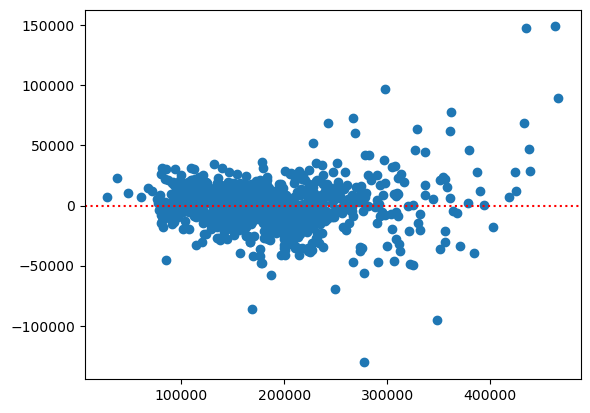

In [145]:
# Residual analysis
y_res = y_train - y_pred_train # Residuals

# Residual v/s predictions plot
plt.scatter(y_pred_train , y_res)
plt.axhline(y=0, color='r', linestyle=':')
plt.show()

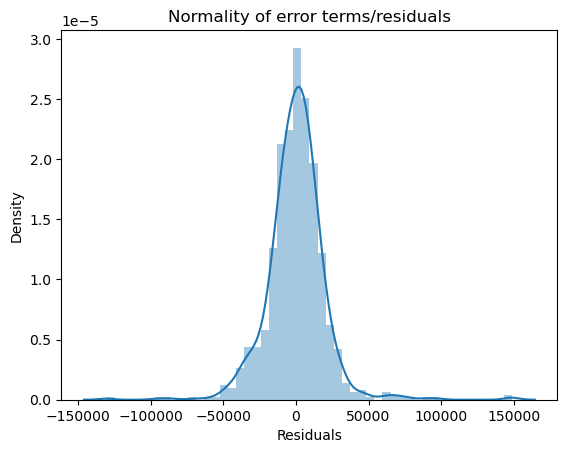

In [146]:
# Distribution of errors
p = sns.distplot(y_res,kde=True)

p = plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

### Model Comparison

In [147]:
# Creating a table which contain all the metrics

score_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)','RMSE (Train)','RMSE (Test)']}
score_metric = pd.DataFrame(score_table)

lr_metric = pd.Series(metric_linear_regression, name = 'Linear Regression')
rg_3_metric = pd.Series(metric_ridge_regression, name = 'Ridge Regression')
ls_100_metric = pd.Series(metric_lasso_regression, name = 'Lasso Regression')

score_metric = pd.concat([score_metric, lr_metric, rg_3_metric, ls_100_metric], axis = 1)

score_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.373154e-01,9.314815e-01,9.244527e-01
1,R2 Score (Test),8.957154e-01,9.119658e-01,9.123151e-01
2,RSS (Train),2.977739e+11,3.254867e+11,3.588761e+11
3,RSS (Test),2.410060e+11,2.034505e+11,2.026434e+11
4,RMSE (Train),1.827094e+04,1.910223e+04,2.005810e+04
5,RMSE (Test),2.508502e+04,2.304783e+04,2.300207e+04


Both Ridge and Lasso models have very close test data R2 score, but Lasso has slight edge and shows best R2 score on test data.

## Conclusion
---

### Variables significant to predict house price are:

In [148]:
significance_matrix = pd.DataFrame()

significance_matrix['Feature Name'] = X_test.columns
significance_matrix['Coefficient'] = pd.Series(lasso.coef_)
significance_matrix['Absolute Coefficient'] = pd.Series(np.abs(lasso.coef_))

significance_matrix = significance_matrix.loc[significance_matrix['Coefficient'] != 0]

significance_matrix.sort_values(by=['Absolute Coefficient'], inplace=True, ascending=False)

significance_matrix.head(10)

,Feature Name,Coefficient,Absolute Coefficient
14,GrLivArea,163767.732454,163767.732454
3,OverallQual,68344.702927,68344.702927
11,TotalBsmtSF,61115.409910,61115.409910
8,BsmtFinSF1,42700.036245,42700.036245
5,YearBuilt,32117.606789,32117.606789
4,OverallCond,30908.014078,30908.014078
60,Neighborhood_NridgHt,25022.776939,25022.776939
130,ExterQual_TA,-24609.509546,24609.509546
66,Neighborhood_StoneBr,23754.287788,23754.287788
129,ExterQual_Gd,-21995.772736,21995.772736


- Significant top 10 features that affect house price are below, and there significance is as shown by Coefficients above

| Feature Name         | Description                                             |
| -----------          | -----------                                             |
| GrLivArea            | Above grade (ground) living area square feet            |
| OverallQual          | Overall material and finish of the house                |
| TotalBsmtSF          | Total square feet of basement area                      |
| BsmtFinSF1           | Type 1 finished square feet                             |
| YearBuilt            | Original construction date                              |
| OverallCond          | Overall condition of the house                          |
| Neighborhood_NridgHt | Location Northridge Heights                            |
| ExterQual_TA         | Quality of the material on the exterior Average/Typical |
| Neighborhood_StoneBr | Location Stone Brook                                   |
| ExterQual_Gd         | Quality of the material on the exterior Good            |

- Optimal value for Ridge regression is found to be 3.0
- Optimal value for Lasso regression is found to be 100.0

---

---

---

## Assignment - Part 2

### Question 1. Find effect of doubling optimal alpha values on Ridge and Lasso models

In [149]:
# Ridge Regression
# Fitting Ridge model for alpha = 6
alpha = 6.0
ridge_6 = Ridge(alpha=alpha)
ridge_6.fit(X_train, y_train)

Ridge(alpha=6.0)

In [150]:
# Calculate score metrics - R2 Score, RSS, RSME
y_pred_train = ridge_6.predict(X_train)
y_pred_test = ridge_6.predict(X_test)
metric_ridge_regression_aphla_6 = calculate_score_metrics(y_train, y_pred_train, y_test, y_pred_test)

R2 score train :  0.9261017551187153
R2 score test  :  0.9093349901552273
RSS score train :  351042515278.14325
RSS score test  :  209530499710.06714
MSE score train :  393545420.71540725
MSE score test  :  547077022.7416897


In [151]:
# Lasso Regression
# Fitting Lasso model for alpha = 200
alpha = 200.0
lasso_200 = Lasso(alpha=alpha)        
lasso_200.fit(X_train, y_train) 

Lasso(alpha=200.0)

In [152]:
# Calculate score metrics - R2 Score, RSS, RSME
y_pred_train = lasso_200.predict(X_train)
y_pred_test = lasso_200.predict(X_test)
metric_lasso_regression_aphla_200 = calculate_score_metrics(y_train, y_pred_train, y_test, y_pred_test)

R2 score train :  0.9160205424303056
R2 score test  :  0.9068332428887488
RSS score train :  398931802295.426
RSS score test  :  215312138688.44482
MSE score train :  447232962.2146032
MSE score test  :  562172685.8706131


In [153]:
# Model Comparison with new alpha values
score_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)','RMSE (Train)','RMSE (Test)']}

score_metric = pd.DataFrame(score_table)

rg_3_metric = pd.Series(metric_ridge_regression, name = 'Ridge Regression (alpha 3)')
rg_6_metric = pd.Series(metric_ridge_regression_aphla_6, name = 'Ridge Regression (alpha 6)')
ls_100_metric = pd.Series(metric_lasso_regression, name = 'Lasso Regression (alpha 100)')
ls_200_metric = pd.Series(metric_lasso_regression_aphla_200, name = 'Lasso Regression (alpha 200)')

score_metric = pd.concat([score_metric, rg_3_metric, rg_6_metric, ls_100_metric, ls_200_metric], axis = 1)

score_metric

,Metric,Ridge Regression (alpha 3),Ridge Regression (alpha 6),Lasso Regression (alpha 100),Lasso Regression (alpha 200)
0,R2 Score (Train),9.314815e-01,9.261018e-01,9.244527e-01,9.160205e-01
1,R2 Score (Test),9.119658e-01,9.093350e-01,9.123151e-01,9.068332e-01
2,RSS (Train),3.254867e+11,3.510425e+11,3.588761e+11,3.989318e+11
3,RSS (Test),2.034505e+11,2.095305e+11,2.026434e+11,2.153121e+11
4,RMSE (Train),1.910223e+04,1.983798e+04,2.005810e+04,2.114788e+04
5,RMSE (Test),2.304783e+04,2.338968e+04,2.300207e+04,2.371018e+04


In [154]:
significance_matrix = pd.DataFrame()

significance_matrix['Feature Name'] = X_test.columns
significance_matrix['Coefficient'] = pd.Series(lasso_200.coef_)
significance_matrix['Absolute Coefficient'] = pd.Series(np.abs(lasso_200.coef_))

significance_matrix = significance_matrix.loc[significance_matrix['Coefficient'] != 0]

significance_matrix.sort_values(by=['Absolute Coefficient'], inplace=True, ascending=False)

significance_matrix.head(10)

,Feature Name,Coefficient,Absolute Coefficient
14,GrLivArea,165582.046101,165582.046101
3,OverallQual,71497.362545,71497.362545
11,TotalBsmtSF,60637.440024,60637.440024
8,BsmtFinSF1,39777.374491,39777.374491
60,Neighborhood_NridgHt,25290.810040,25290.810040
130,ExterQual_TA,-24015.407662,24015.407662
4,OverallCond,23972.994385,23972.994385
21,GarageCars,21897.670116,21897.670116
204,SaleCondition_Partial,20951.229435,20951.229435
5,YearBuilt,20821.417388,20821.417388


### Question 3. Build Lasso model without top 5 best predictor variables

In [155]:
# My top 5 predictor variables in lasso model (using optimal alpha of 100) are
# So, lets drop these 5 from the dataset, and rebuild the model
cols_to_drop = ['GrLivArea', 'OverallQual', 'TotalBsmtSF', 'BsmtFinSF1', 'YearBuilt']

print('Before :', X_train.shape)
X_train.drop(cols_to_drop, axis = 1, inplace=True)
X_test.drop(cols_to_drop, axis = 1, inplace=True)
print('After :', X_train.shape)

Before : (892, 205)
After : (892, 200)


In [156]:
lasso = Lasso()
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [157]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 100}


In [158]:
# Fitting Lasso model for best alpha
alpha = 100
lasso_without_best_5_features = Lasso(alpha=alpha)        
lasso_without_best_5_features.fit(X_train, y_train) 

Lasso(alpha=100)

In [159]:
# Calculate score metrics - R2 Score, RSS, RSME
y_pred_train = lasso_without_best_5_features.predict(X_train)
y_pred_test = lasso_without_best_5_features.predict(X_test)
metric_lasso_regression_without_best_5 = calculate_score_metrics(y_train, y_pred_train, y_test, y_pred_test)

R2 score train :  0.9131924365770386
R2 score test  :  0.9027837834252207
RSS score train :  412366294465.01086
RSS score test  :  224670603066.28363
MSE score train :  462294052.09081936
MSE score test  :  586607318.7109233


In [160]:
significance_matrix = pd.DataFrame()

significance_matrix['Feature Name'] = X_test.columns
significance_matrix['Coefficient'] = pd.Series(lasso_without_best_5_features.coef_)
significance_matrix['Absolute Coefficient'] = pd.Series(np.abs(lasso_without_best_5_features.coef_))

significance_matrix = significance_matrix.loc[significance_matrix['Coefficient'] != 0]

significance_matrix.sort_values(by=['Absolute Coefficient'], inplace=True, ascending=False)

significance_matrix.head(10)

,Feature Name,Coefficient,Absolute Coefficient
8,1stFlrSF,184786.684071,184786.684071
9,2ndFlrSF,98585.671229,98585.671229
23,houseAge,-42437.601326,42437.601326
3,OverallCond,36080.918671,36080.918671
61,Neighborhood_StoneBr,32435.437593,32435.437593
55,Neighborhood_NridgHt,31647.026049,31647.026049
125,ExterQual_TA,-31032.668538,31032.668538
142,BsmtExposure_Gd,26834.670833,26834.670833
16,GarageCars,26612.162758,26612.162758
124,ExterQual_Gd,-24657.439454,24657.439454


---